In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import datetime

In [2]:
#acquire data
train_df  = pd.read_csv('train.csv')
test_df  = pd.read_csv('test.csv')
all_df = train_df.append(test_df)

In [3]:
all_df.reset_index(inplace=True, drop=True)

In [4]:
all_df.head()

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,113261,38038,513.80,5,0,N,0,N,N,...,0,33,172652.0,457,59333,N,0,102,0,516056
1,0,134508,45725,465.62,5,0,N,2,N,N,...,0,9,105114.0,451,0,N,5817,102,0,4376
2,6881,15408,188328,513.80,5,0,N,0,N,N,...,0,6,152458.0,457,59333,N,0,102,0,483434
3,6716,157159,29967,1016.11,5,62,N,5,N,N,...,0,5,172946.0,247,50436,N,3281,102,0,1407164
4,5975,105985,81305,713.66,5,62,N,4,N,N,...,0,6,182129.0,263,93775,N,5817,102,0,1051004


## 觀察資料的一些統計值

In [5]:
all_df.describe()

,acqic,bacno,cano,conam,contp,csmcu,etymd,fraud_ind,hcefg,iterm,locdt,loctm,mcc,mchno,scity,stocn,stscd,txkey
count,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.521787e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06
mean,6.004543e+03,8.208741e+04,1.090453e+05,6.516174e+02,4.825625e+00,5.378875e+01,4.142680e+00,1.337572e-02,4.748365e+00,4.841128e-02,5.839281e+01,1.460061e+05,2.979138e+02,5.589230e+04,4.754399e+03,9.562308e+01,2.475286e-02,9.791667e+05
std,1.505735e+03,4.732348e+04,6.110356e+04,4.032183e+02,6.557577e-01,2.076681e+01,2.402570e+00,1.148774e-01,1.114383e+00,3.615652e-01,3.409522e+01,5.227967e+04,7.841150e+01,3.082944e+04,1.982351e+03,1.896446e+01,2.211643e-01,5.654969e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.982000e+03,4.129400e+04,5.751900e+04,4.300400e+02,5.000000e+00,6.200000e+01,2.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,2.900000e+01,1.104500e+05,2.500000e+02,3.362500e+04,3.952000e+03,1.020000e+02,0.000000e+00,4.896218e+05
50%,6.678000e+03,8.196600e+04,1.099410e+05,5.887500e+02,5.000000e+00,6.200000e+01,4.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,5.800000e+01,1.513290e+05,2.640000e+02,5.933300e+04,5.817000e+03,1.020000e+02,0.000000e+00,9.794235e+05
75%,6.769000e+03,1.229640e+05,1.621700e+05,8.025400e+02,5.000000e+00,6.200000e+01,5.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,8.700000e+01,1.857550e+05,3.430000e+02,7.920000e+04,5.817000e+03,1.020000e+02,0.000000e+00,1.468711e+06
max,6.884000e+03,1.638860e+05,2.135750e+05,7.208770e+03,6.000000e+00,7.500000e+01,1.000000e+01,1.000000e+00,9.000000e+00,8.000000e+00,1.200000e+02,2.359590e+05,4.590000e+02,1.033070e+05,6.671000e+03,1.080000e+02,4.000000e+00,1.959018e+06


In [6]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1943452 entries, 0 to 1943451
Data columns (total 23 columns):
acqic        int64
bacno        int64
cano         int64
conam        float64
contp        int64
csmcu        int64
ecfg         object
etymd        int64
flbmk        object
flg_3dsmk    object
fraud_ind    float64
hcefg        int64
insfg        object
iterm        int64
locdt        int64
loctm        float64
mcc          int64
mchno        int64
ovrlt        object
scity        int64
stocn        int64
stscd        int64
txkey        int64
dtypes: float64(3), int64(15), object(5)
memory usage: 341.0+ MB


In [7]:
all_df.groupby("fraud_ind").sum()

,acqic,bacno,cano,conam,contp,csmcu,etymd,hcefg,iterm,locdt,loctm,mcc,mchno,scity,stocn,stscd,txkey
fraud_ind,,,,,,,,,,,,,,,,,
0.0,9042587114,123250593278,163482476248,9.818490e+08,7248321,80778143,6201258,7125821,75449,68109434,2.200713e+11,447178405,83981036021,7149439802,144147015,26497,1454724032904
1.0,100313285,1673308849,2266064645,1.449818e+07,100949,1144577,112810,101769,74,869085,2.589286e+09,6023373,1071978969,86852115,1413678,11327,23123718525


In [8]:
num_features = all_df.select_dtypes(include=['int64',"float64"])
categorical_features = all_df.select_dtypes(include='object')

num_features = num_features.drop(["fraud_ind","txkey"], axis=1)
y_series = all_df.fraud_ind
txkey_series = all_df.txkey

print(num_features.shape)
print(categorical_features.shape)

(1943452, 16)
(1943452, 5)


In [9]:
dummies_list = ["contp","etymd","hcefg","stscd"]
my_dummies_df = num_features[dummies_list]
dummies_df=pd.DataFrame()
# # object_features = categorical_features.select_dtypes(include='object').columns
for name in dummies_list:
    print(name)
    dummies = pd.get_dummies(my_dummies_df[name], drop_first=False)
    dummies = dummies.add_prefix("{}_".format(name))
    dummies_df=pd.concat([dummies_df,dummies],axis=1)

contp
etymd
hcefg
stscd


In [10]:
num_features = num_features.drop(dummies_list, axis=1)

In [11]:
dummies_df.columns

Index(['contp_0', 'contp_1', 'contp_2', 'contp_3', 'contp_4', 'contp_5',
       'contp_6', 'etymd_0', 'etymd_1', 'etymd_2', 'etymd_3', 'etymd_4',
       'etymd_5', 'etymd_6', 'etymd_7', 'etymd_8', 'etymd_9', 'etymd_10',
       'hcefg_0', 'hcefg_1', 'hcefg_2', 'hcefg_3', 'hcefg_4', 'hcefg_5',
       'hcefg_6', 'hcefg_7', 'hcefg_8', 'hcefg_9', 'stscd_0', 'stscd_1',
       'stscd_2', 'stscd_3', 'stscd_4'],
      dtype='object')

In [12]:
categorical_features["null"] = categorical_features["flbmk"].isnull()

In [13]:
categorical_features = categorical_features.fillna(0)

In [14]:
categorical_features = categorical_features.replace(["Y", "N"], [1, 0 ])

In [15]:
# num_features[30:35]

In [16]:
# num_features.groupby("iterm").sum()

In [17]:
categorical_features.head()

,ecfg,flbmk,flg_3dsmk,insfg,ovrlt,null
0,0,0,0,0,0,False
1,0,0,0,0,0,False
2,0,0,0,0,0,False
3,0,0,0,0,0,False
4,0,0,0,0,0,False


In [18]:
scaler = StandardScaler()

num_features_arr = scaler.fit_transform(num_features.values)

num_features = pd.DataFrame(data=num_features_arr,index=num_features.index,columns=num_features.columns)

num_features.head()

,acqic,bacno,cano,conam,csmcu,iterm,locdt,loctm,mcc,mchno,scity,stocn
0,0.582079,0.658734,-1.162081,-0.341794,-2.590131,-0.133894,-0.744762,0.509681,2.028863,0.111604,-2.398364,0.336256
1,-3.987783,1.107708,-1.036278,-0.461282,-2.590131,-0.133894,-1.448673,-0.782179,1.952344,-1.812952,0.536031,0.336256
2,0.582079,-1.409013,1.297514,-0.341794,-2.590131,-0.133894,-1.536662,0.123412,2.028863,0.111604,-2.398364,0.336256
3,0.472498,1.586350,-1.294169,0.903959,0.395402,-0.133894,-1.565992,0.515305,-0.649316,-0.176983,-0.743258,0.336256
4,-0.019621,0.504984,-0.453988,0.153869,0.395402,-0.133894,-1.536662,0.690956,-0.445264,1.228783,0.536031,0.336256


In [19]:
# categorical_features=categorical_features.drop(columns="flbmk",axis=1)
# categorical_features.columns

In [20]:
final_data=pd.concat([num_features,categorical_features,dummies_df],axis=1)
final_data.shape

(1943452, 51)

In [21]:
final_data["txkey"] = txkey_series
final_data["fraud_ind"] = y_series

In [22]:
train_df = final_data[:len(train_df)]

In [23]:
test_df = final_data[len(train_df):]

In [24]:
test_df = test_df.drop("fraud_ind", axis=1)

In [25]:
test_df.head()

,acqic,bacno,cano,conam,csmcu,iterm,locdt,loctm,mcc,mchno,...,hcefg_6,hcefg_7,hcefg_8,hcefg_9,stscd_0,stscd_1,stscd_2,stscd_3,stscd_4,txkey
1521787,0.582079,1.71375,0.126895,-0.341794,-2.590131,-0.133894,1.278983,1.325983,2.028863,0.11248,...,0,0,0,0,1,0,0,0,0,592489
1521788,0.582079,1.71375,0.126895,-0.341794,-2.590131,-0.133894,1.278983,1.453738,2.028863,0.11248,...,0,0,0,0,1,0,0,0,0,592452
1521789,0.582079,1.71375,0.126895,-0.341794,-2.590131,-0.133894,1.220324,0.459202,2.028863,0.11248,...,0,0,0,0,1,0,0,0,0,590212
1521790,0.582079,1.71375,0.126895,-0.341794,-2.590131,-0.133894,1.220324,0.380797,2.028863,0.11248,...,0,0,0,0,1,0,0,0,0,590209
1521791,0.582079,1.71375,0.126895,-0.341794,-2.590131,-0.133894,1.278983,1.325658,2.028863,0.11248,...,0,0,0,0,1,0,0,0,0,592488


In [26]:
train_df.head()

,acqic,bacno,cano,conam,csmcu,iterm,locdt,loctm,mcc,mchno,...,hcefg_7,hcefg_8,hcefg_9,stscd_0,stscd_1,stscd_2,stscd_3,stscd_4,txkey,fraud_ind
0,0.582079,0.658734,-1.162081,-0.341794,-2.590131,-0.133894,-0.744762,0.509681,2.028863,0.111604,...,0,0,0,1,0,0,0,0,516056,0.0
1,-3.987783,1.107708,-1.036278,-0.461282,-2.590131,-0.133894,-1.448673,-0.782179,1.952344,-1.812952,...,0,0,0,1,0,0,0,0,4376,0.0
2,0.582079,-1.409013,1.297514,-0.341794,-2.590131,-0.133894,-1.536662,0.123412,2.028863,0.111604,...,0,0,0,1,0,0,0,0,483434,0.0
3,0.472498,1.586350,-1.294169,0.903959,0.395402,-0.133894,-1.565992,0.515305,-0.649316,-0.176983,...,0,0,0,1,0,0,0,0,1407164,0.0
4,-0.019621,0.504984,-0.453988,0.153869,0.395402,-0.133894,-1.536662,0.690956,-0.445264,1.228783,...,0,0,0,1,0,0,0,0,1051004,0.0


In [27]:
train_df[train_df["fraud_ind"] == 1].shape[0]/train_df[train_df["fraud_ind"] == 0].shape[0]

0.013557057529078907

In [28]:
# train_df[train_df["fraud_ind"] == 1]

,acqic,bacno,cano,conam,csmcu,iterm,locdt,loctm,mcc,mchno,...,hcefg_7,hcefg_8,hcefg_9,stscd_0,stscd_1,stscd_2,stscd_3,stscd_4,txkey,fraud_ind
70,-1.804131,0.136308,-0.458440,-1.612619,0.395402,-0.133894,-1.507332,-1.923292,0.498475,-1.132304,...,0,0,0,0,0,1,0,0,651056,1.0
349,0.582079,1.601142,-0.427476,-0.341794,-2.590131,-0.133894,-1.038058,0.155528,2.028863,0.112480,...,0,0,0,1,0,0,0,0,503429,1.0
1133,0.507697,-1.002133,-0.584095,0.065132,0.395402,-0.133894,-0.128840,0.512703,0.957592,0.771039,...,0,0,0,1,0,0,0,0,259268,1.0
1208,0.565476,-0.167029,-1.487545,-1.046598,0.395402,-0.133894,-0.774092,-0.633211,-0.126433,0.432953,...,0,0,0,1,0,0,0,0,1423892,1.0
1254,0.582079,0.910660,-0.993810,-0.341794,-2.590131,-0.133894,0.252446,-1.916291,2.028863,0.112480,...,0,0,0,1,0,0,0,0,554270,1.0
1888,0.139770,-0.805338,0.328667,-0.248271,0.395402,-0.133894,-0.422136,-0.385600,-0.113680,-0.034522,...,0,0,0,0,0,1,0,0,1879721,1.0
2090,-3.987783,-0.883165,-0.993368,-1.616042,-2.590131,-0.133894,-1.155377,-0.389254,0.536735,1.531449,...,0,0,0,1,0,0,0,0,1956048,1.0
2156,0.507697,-1.548817,-1.746663,-0.784209,0.395402,-0.133894,-0.187499,-0.481278,-1.210458,0.771007,...,0,0,0,1,0,0,0,0,431725,1.0
2465,0.139770,-0.465380,-0.131241,-1.616042,0.395402,-0.133894,-0.011521,-1.438056,-0.113680,-0.034522,...,0,0,0,1,0,0,0,0,1894311,1.0
3297,0.265954,1.603551,-0.188979,3.033451,-2.397516,-0.133894,-1.126047,1.117202,0.307177,0.120168,...,0,0,0,0,0,1,0,0,1853832,1.0


In [29]:
# random forest
X = train_df.drop(labels=['fraud_ind','txkey'],axis=1)

In [30]:
# X.head()
y = train_df['fraud_ind']

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier

# split the dataset 

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [33]:
X_train.shape

(1369608, 51)

In [34]:
X_train["y_train"] = y_train
int(sum(y_train)*2)

36774

In [35]:
# my_X_train = X_train.sort_values("y_train", ascending=False)
# my_X_train = my_X_train[:int(sum(y_train)*2)]
my_X_1 = X_train[y_train == 1]
my_X_0 = X_train[y_train == 0].sample(n=int(sum(y_train)*30), random_state=82041)
my_X = pd.concat([my_X_0, my_X_1], axis=0)

In [36]:
from sklearn.utils import shuffle

In [37]:
my_X = shuffle(my_X)

In [38]:
my_y_train = my_X['y_train']

In [39]:
my_X_train = my_X.drop(labels=['y_train'],axis=1)

## Random forest

In [40]:
# t1 = datetime.datetime.now()

In [41]:
rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=50,
                             min_samples_split=15,
                             min_samples_leaf=1,
                             oob_score=True,
                             random_state=82041,
                             n_jobs=-1) 

rf.fit(my_X_train, my_y_train)
print("%.4f" % rf.oob_score_)

0.9866


In [42]:
# t2 = datetime.datetime.now()
# print((t2-t1).seconds)

In [43]:
y_pred = rf.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[149791,    420],
       [   661,   1307]])

In [45]:
def get_f1_score(confusion_matrix, i):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    
    for j in range(len(confusion_matrix)):
        if (i == j):
            # true positive: 真實為i，預測為i (confusion matrix 中的對角線項目)
            TP += confusion_matrix[i, j]
            tmp = np.delete(confusion_matrix, i, 0)
            tmp = np.delete(tmp, j, 1)
            # true negative: 真實不為i, 預測不為i (confusion matrix 中, row=col=i 以外的項目總合)
            TN += np.sum(tmp)
        else:
            if (confusion_matrix[i, j] != 0):
                # false negative: 真實為i, 預測不為i (confusion matrix中, row i 上不為0的總數)
                FN += confusion_matrix[i, j]
            if (confusion_matrix[j, i] != 0):
                # false positive: 真實不為i, 預測為i (confusion matrix中, col i 上不為0的總數)
                FP += confusion_matrix[j, i]

    recall = TP / (FN + TP)
    precision = TP / (TP + FP)
    f1_score = 2 * 1/(1/recall + 1/precision)
    
    return f1_score

In [46]:
get_f1_score(conf_mat,1)

0.7074424898511502

In [47]:
y_pred.sum()/len(y_pred)

0.011348477779457087

In [48]:
x_submit = test_df.drop(labels=['txkey'],axis=1)
pred = rf.predict(x_submit)

In [49]:
submit = pd.DataFrame({"txkey": test_df['txkey'],
                      "fraud_ind":pred.astype(int)})

In [50]:
submit.to_csv('submission04.csv', index=False)

In [51]:
submit["fraud_ind"].sum()/submit["fraud_ind"].shape[0]

0.009277507025719469

## Xgboost

In [58]:
t1 = datetime.datetime.now()

In [59]:
warnings.filterwarnings('ignore')
parameters= {'n_estimators':[10], 'learning_rate':[0.1,0.05], 'max_depth':[12],\
             "gamma":[0, 0.1], "scale_pos_weight": [1, 2, 5]}
#             "gamma":[0.01], "lambda": [0.01], "scale_pos_weight": [5, 10]}
xgb_model = XGBClassifier()
xgb_model.fit(my_X_train, my_y_train)
xgb_best_model = RandomizedSearchCV(xgb_model, parameters, cv=3, scoring='accuracy', return_train_score='cv_results_')
xgb_best_model.fit(my_X_train, my_y_train)

RandomizedSearchCV(cv=3, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [10], 'learning_rate': [0.1, 0.05], 'max_depth': [12], 'gamma': [0, 0.1], 'scale_pos_weight': [1, 2, 5]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='cv_results_', scoring='accuracy', verbose=0)

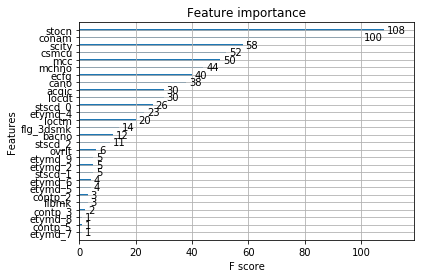

In [60]:
from xgboost import plot_importance
plot_importance(xgb_model)
plt.show()

In [61]:
t2 = datetime.datetime.now()
print((t2-t1).seconds/60)

10.483333333333333


In [62]:
y_pred = xgb_best_model.predict(X_test)

In [63]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[149644,    567],
       [   750,   1218]])

In [64]:
get_f1_score(conf_mat,1)

0.6490807354116707

In [65]:
t2 = datetime.datetime.now()
print((t2-t1).seconds)


630


## Logistic regression

In [66]:
# parameters = {'penalty': ['l2'], 'max_iter': [100, 150,200],
#                      'C': [1, 10, 100, 1000]}

# logistic_model = LogisticRegression()
# #logistic_model.fit(scale_all['StandardScaler']['x_train'], Y_train)
# logistic_best_model = RandomizedSearchCV(logistic_model, parameters, cv=5, scoring='accuracy', return_train_score='cv_results_')
# logistic_best_model.fit(X_train, y_train)

# logistic_best_model.best_estimator_

In [67]:
# logistic_best_model.score(X_test, y_test)

## ensemble by voting

In [68]:
# vclf = VotingClassifier(estimators=[('svc', svc_best_model), ('rf', rf), ('xgb', xgb_best_model), ('lg', logistic_best_model)])

In [69]:
# vclf.fit(X_train, y_train)

In [70]:
# vclf.score(X_test, y_test)

In [90]:
x_submit = test_df.drop(labels=['txkey'],axis=1)
pred = xgb_best_model.predict(x_submit)

In [91]:
submit = pd.DataFrame({"txkey": test_df['txkey'],
                      "fraud_ind":pred.astype(int)})

In [92]:
submit.to_csv('submission05.csv', index=False)

In [93]:
submit["fraud_ind"].sum()/submit["fraud_ind"].shape[0]

0.011770006996075083

In [94]:
my_df04 = pd.read_csv('./submission04.csv')

In [95]:
my_df05 = pd.read_csv('./submission05.csv')

In [96]:
sum(my_df04.fraud_ind != my_df05.fraud_ind)

2467